# BayesianSimulatedData3

For one chosen setting of parameters (e.g. a = 2, ρ = 0.5) generate a scatter plot showing observations from training set. Mark observations belonging to different classes
using two different colors and two different symbols. Draw curves that separate classes
for LDA and QDA. Save the results in the file BayesianSimulatedData3.pdf


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.metrics import accuracy_score

from scheme_dataset import scheme1_dataset, scheme2_dataset

from LDA import LDA
from QDA import QDA
from NB import NB

np.random.seed(123)

In [2]:
a = 2
rho = 0.5
res = {"LDA": None, "QDA": None, "NB": None}
res_models = {"LDA": None, "QDA": None, "NB": None}

models = [LDA(), QDA(), NB()]
# Define train and test dataset
scheme1_train_X, scheme1_train_y = scheme1_dataset(a)
scheme1_test_X, scheme1_test_y = scheme1_dataset(a)
scheme2_train_X, scheme2_train_y = scheme2_dataset(a, rho)
scheme2_test_X, scheme2_test_y = scheme2_dataset(a, rho)

model_res = []
pred_res = []
for i in range(3): 
    # Schema 2
    model = models[i]
    model.fit(scheme2_train_X, scheme1_train_y)
    model_predictions = model.predict(scheme2_test_X)
    pred_res.append(model_predictions)
    model_res.append(model)
res["LDA"] = pred_res[0]
res["QDA"] = pred_res[1]
res["NB"] = pred_res[2]
res_models["LDA"] = model_res[0]
res_models["QDA"] = model_res[1]
res_models["NB"] = model_res[2]

In [3]:
def plot_model(model, prediction, title): 
    model_predictions = prediction
    model = model
    plt.figure(figsize=(8, 6))

    true0_pred0 = (scheme1_test_y==0) & (model_predictions==0) 
    true1_pred0 = (scheme1_test_y==1) & (model_predictions==0) 
    true0_pred1 = (scheme1_test_y==0) & (model_predictions==1) 
    true1_pred1 = (scheme1_test_y==1) & (model_predictions==1) 

    plt.scatter(scheme2_test_X[true0_pred0]["X_1"], scheme2_test_X[true0_pred0]["X_2"], c="orange")
    plt.scatter(scheme2_test_X[true0_pred1]["X_1"], scheme2_test_X[true0_pred1]["X_2"], c="blue", marker="x")
    plt.scatter(scheme2_test_X[true1_pred0]["X_1"], scheme2_test_X[true1_pred0]["X_2"], c="red", marker="+")
    plt.scatter(scheme2_test_X[true1_pred1]["X_1"], scheme2_test_X[true1_pred1]["X_2"], c="green")


    # Step 3: Create a mesh grid to plot decision boundary
    x_min, x_max = scheme2_test_X["X_1"].min() - 1, scheme2_test_X["X_1"].max() + 1
    y_min, y_max = scheme2_test_X["X_2"].min() - 1, scheme2_test_X["X_2"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Step 4: Predict for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Step 5: Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.title(title)#f"Scatter plot for a = 2 and rho = 0.5"
    plt.show()

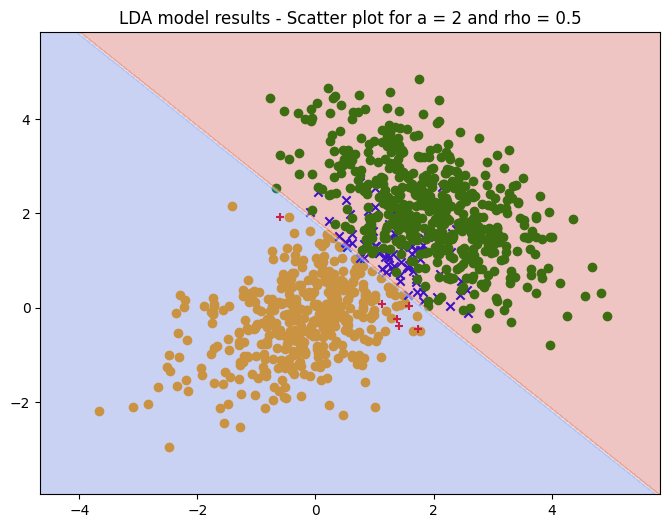

In [4]:
# LDA
model_predictions = res["LDA"]
model = res_models["LDA"]

plot_model(model, model_predictions, "LDA model results - Scatter plot for a = 2 and rho = 0.5")



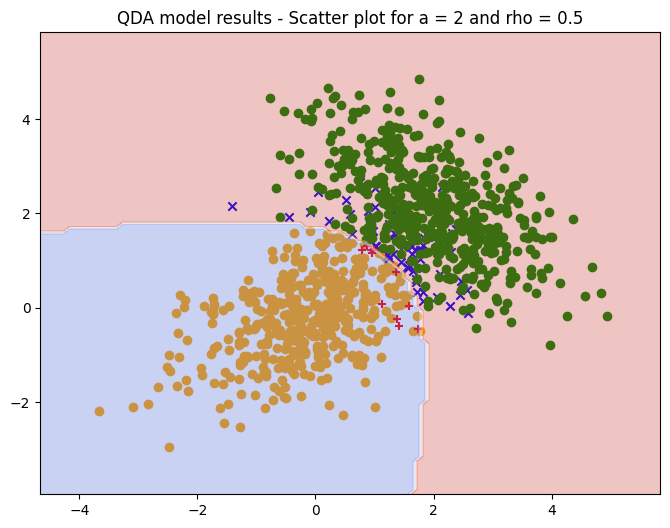

In [5]:
# QDA
model_predictions = res["QDA"]
model = res_models["QDA"]

plot_model(model, model_predictions, "QDA model results - Scatter plot for a = 2 and rho = 0.5")

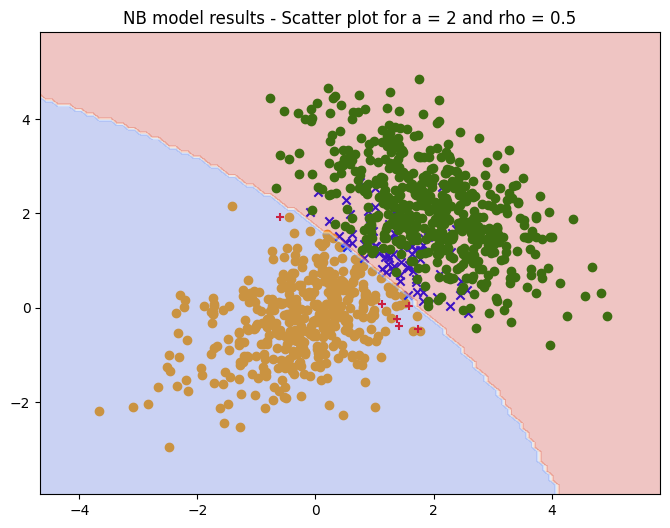

In [6]:
# NB
model_predictions = res["NB"]
model = res_models["NB"]

plot_model(model, model_predictions, "NB model results - Scatter plot for a = 2 and rho = 0.5")